In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.isnull().sum()

#many null values are present

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

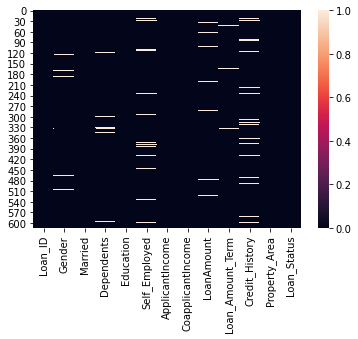

In [5]:
sns.heatmap(df.isnull())
plt.show()

# EDA

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.dtypes

#label encoding is required here.

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()                              #initiating object from class
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [10]:
df['Loan_ID']

0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object

In [11]:
df['Loan_ID'].nunique()

#All the loan ids are unique
#We will be removing the first two letters from them

614

In [12]:
#code to remove the first two letters.

import re as re
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)
df['Loan_ID']=df['Loan_ID'].apply(lambda x: find_number(x))

In [13]:
#code to remove the first two alphabets from the 'Loan_ID' column
df['Loan_ID']=df['Loan_ID'].astype(str).str[2:].astype(int)

In [14]:
df.dtypes

#Loan ID has been converted to int after removing the 'WP00' from the data.

Loan_ID                int32
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [15]:
#dealing with the null values present in various coulmns
sum([True for idx,row in df.iterrows() if any(row.isnull())])

#There are 134 rows containing null values.
#Deleting all the rows could cause high loss of data which is not desired.

134

In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
df['Gender'].value_counts()

#Most are male. So we are converting all NaN values to male.

Male      489
Female    112
Name: Gender, dtype: int64

In [18]:
df['Gender']=df['Gender'].fillna('Male')

In [19]:
#'Married' column has only 3 NaN values.
#So we are dropping the rows that contain NaN values in 'Married' column.

df = df.dropna(axis=0, subset=['Married'])

In [20]:
df['Dependents'].value_counts()

#We have to replace the 3+ with 3.

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [21]:
df['Dependents']=df['Dependents'].replace(to_replace ="3+",
                 value ="3")

In [22]:
df['Dependents'].value_counts()

#Since most applicants has 0 dependents, we are replacing the NaN values with 0 in 'Dependents' column.

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [23]:
df['Dependents']=df['Dependents'].fillna('0')

In [24]:
#converting 'Dependents' from object to int.
df['Dependents']=df['Dependents'].astype(int)

In [25]:
df['Self_Employed'].value_counts()

#Most values are 'No'. So we are replacing all 'NaN' values with 'No'

No     497
Yes     82
Name: Self_Employed, dtype: int64

In [26]:
df['Self_Employed']=df['Self_Employed'].fillna('No')

In [27]:
print(df['LoanAmount'].mean())
print(df['LoanAmount'].median())
print(df['LoanAmount'].max())
print(df['LoanAmount'].min())

#since there is less difference between mean() and median(), We are replacing the NaN values in 'LoanAmount' column with mean.

146.36949152542374
127.5
700.0
9.0


In [28]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [29]:
print(df['Loan_Amount_Term'].value_counts())
print(df['Loan_Amount_Term'].mean())
print(df['Loan_Amount_Term'].median())

#since very high number of people have taken a term 360, we are replacing all NaN values with 360.

360.0    511
180.0     44
480.0     14
300.0     13
84.0       4
240.0      3
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
341.90954773869345
360.0


In [30]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [31]:
df['Credit_History'].value_counts()

#Since very high number of people has credit history of 1.0, we are replacing all NaN values in the column with 1.0

1.0    472
0.0     89
Name: Credit_History, dtype: int64

In [32]:
df['Credit_History']=df['Credit_History'].fillna(1.0)

In [33]:
df.isnull().sum()

#No more null values present in dataset.

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
df.shape

(611, 13)

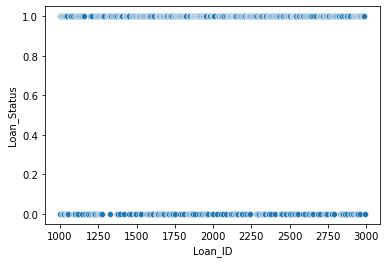

In [35]:
sns.scatterplot(x=df['Loan_ID'],y=df['Loan_Status'])
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Loan_Status'>

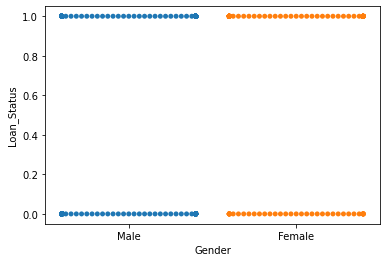

In [36]:
sns.swarmplot(x=df['Gender'],y=df['Loan_Status'])

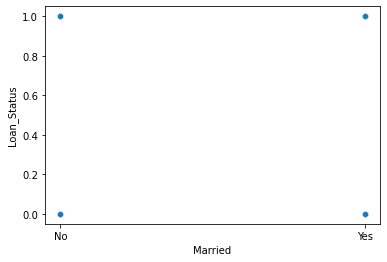

In [37]:
sns.scatterplot(x=df['Married'],y=df['Loan_Status'])
plt.show()

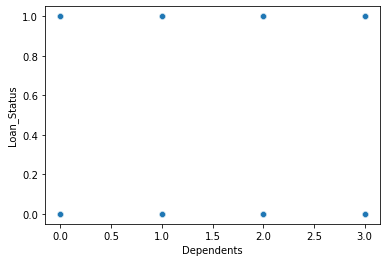

In [38]:
sns.scatterplot(x=df['Dependents'],y=df['Loan_Status'])
plt.show()

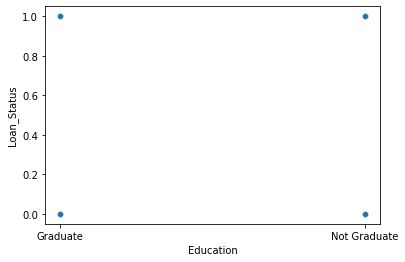

In [39]:
sns.scatterplot(x=df['Education'],y=df['Loan_Status'])
plt.show()

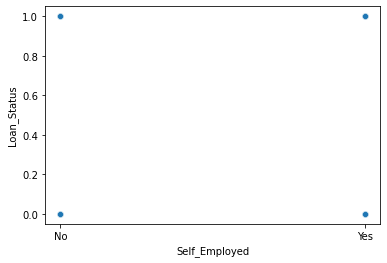

In [40]:
sns.scatterplot(x=df['Self_Employed'],y=df['Loan_Status'])
plt.show()

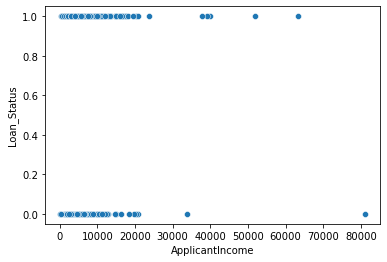

In [41]:
sns.scatterplot(x=df['ApplicantIncome'],y=df['Loan_Status'])
plt.show()

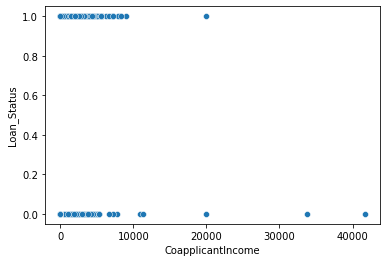

In [42]:
sns.scatterplot(x=df['CoapplicantIncome'],y=df['Loan_Status'])
plt.show()

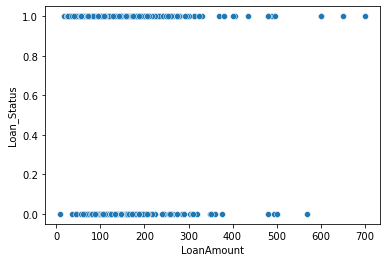

In [43]:
sns.scatterplot(x=df['LoanAmount'],y=df['Loan_Status'])
plt.show()

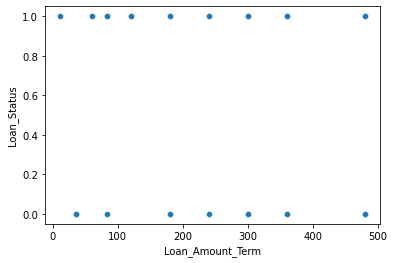

In [44]:
sns.scatterplot(x=df['Loan_Amount_Term'],y=df['Loan_Status'])
plt.show()

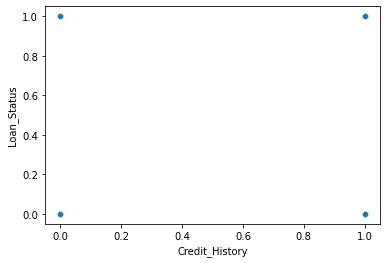

In [45]:
sns.scatterplot(x=df['Credit_History'],y=df['Loan_Status'])
plt.show()

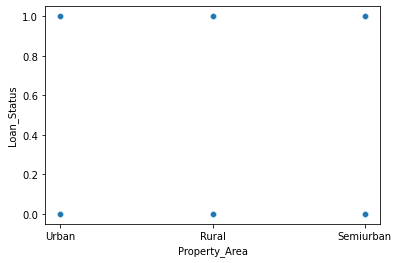

In [46]:
sns.scatterplot(x=df['Property_Area'],y=df['Loan_Status'])
plt.show()

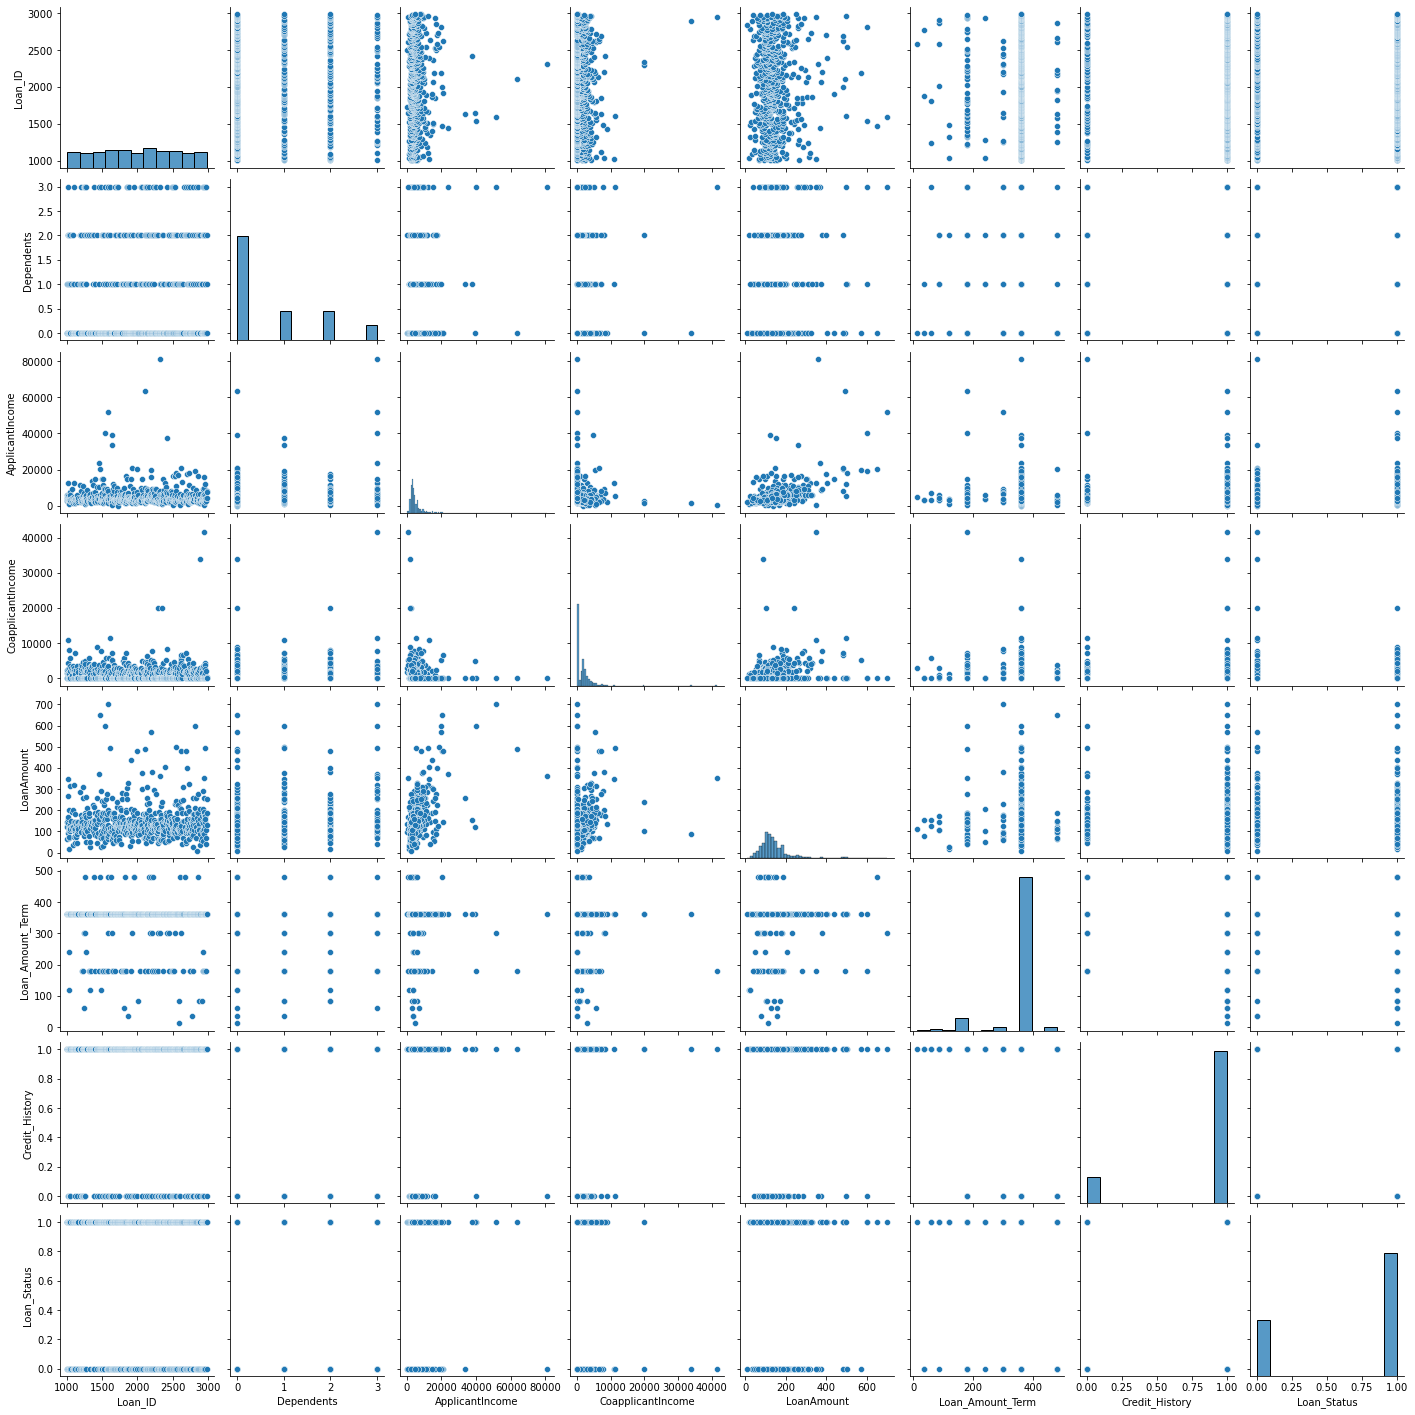

In [47]:
sns.pairplot(df)

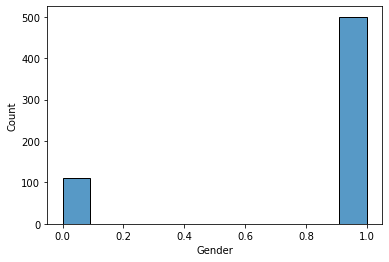

In [48]:
#doing Label_Encoding and plotting histogram

df['Gender']=le.fit_transform(df['Gender'])

sns.histplot(df['Gender'])
plt.show()

#Males have applied for loans in more numbers

<AxesSubplot:xlabel='Married', ylabel='Count'>

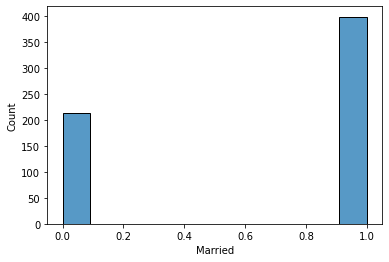

In [49]:
#doing Label_Encoding and plotting histogram
df['Married']=le.fit_transform(df['Married'])

sns.histplot(df['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

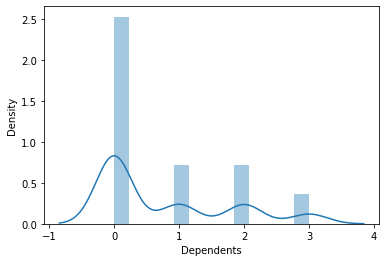

In [50]:
sns.distplot(df['Dependents'])

#skewness present in data

#Most of the applicants have no dependents

<AxesSubplot:xlabel='Education', ylabel='Count'>

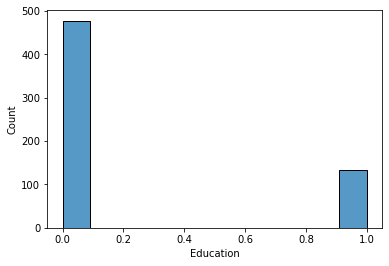

In [51]:
#doing Label_Encoding and plotting histogram
df['Education']=le.fit_transform(df['Education'])


sns.histplot(df['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='Count'>

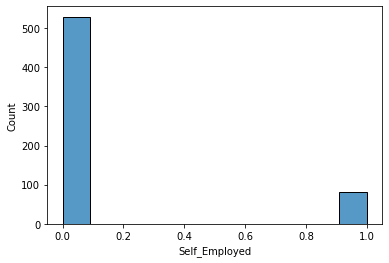

In [52]:
#doing Label_Encoding and plotting histogram
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

sns.histplot(df['Self_Employed'])

#Most non- self employed applies for loan

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

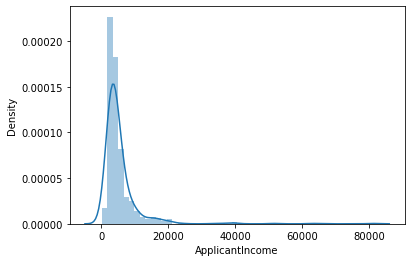

In [53]:
sns.distplot(df['ApplicantIncome'])

#Litte skewness present in data

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

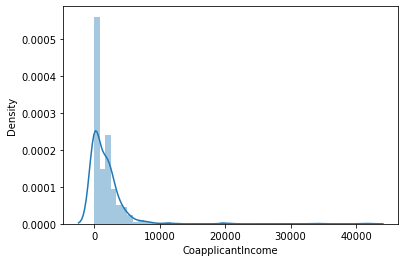

In [54]:
sns.distplot(df['CoapplicantIncome'])

#Little skewness present in data.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

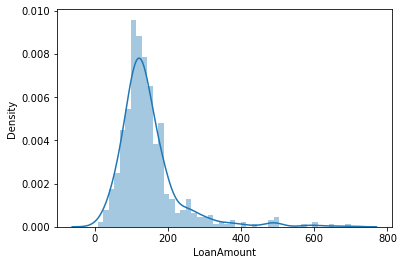

In [55]:
sns.distplot(df['LoanAmount'])

#Slighr skewness present in data

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

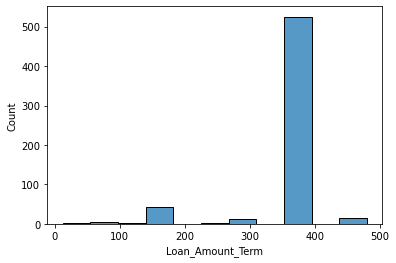

In [56]:
sns.histplot(df['Loan_Amount_Term'])


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

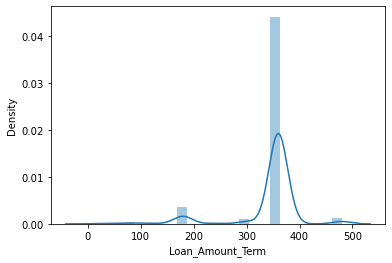

In [57]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

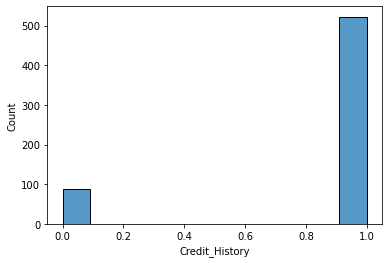

In [58]:
sns.histplot(df['Credit_History'])

#Most of the applicants have applied for loan earlier.

<AxesSubplot:xlabel='Property_Area', ylabel='Count'>

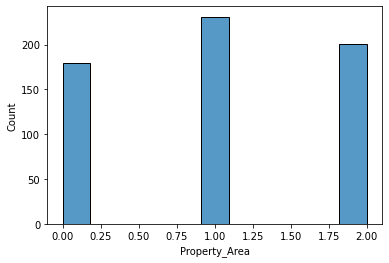

In [59]:
#doing Label_Encoding and plotting histogram
df['Property_Area']=le.fit_transform(df['Property_Area'])

sns.histplot(df['Property_Area'])

In [60]:
df.dtypes

#none are in odject datatype

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [61]:
df.shape

(611, 13)

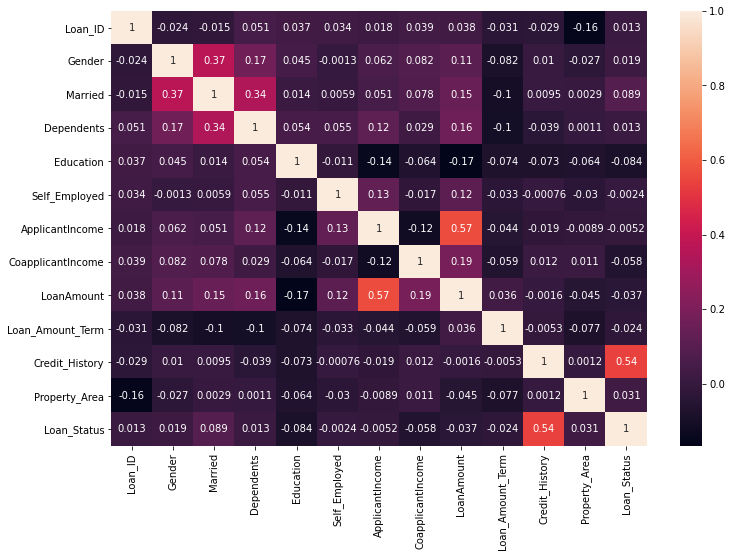

In [62]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()


In [63]:
#checking the skewness present in data
df.skew().sort_values(ascending=False)

#High skewness are present inm some coulumns. So we are applying power_transform.

CoapplicantIncome    7.479901
ApplicantIncome      6.535346
LoanAmount           2.721780
Self_Employed        2.151498
Education            1.360037
Dependents           1.008242
Loan_ID             -0.022136
Property_Area       -0.063725
Married             -0.636955
Loan_Status         -0.802299
Gender              -1.655280
Credit_History      -2.013844
Loan_Amount_Term    -2.444382
dtype: float64

In [64]:
from sklearn.preprocessing import power_transform
df['CoapplicantIncome']=power_transform(df['CoapplicantIncome'].values.reshape(-1,1)) 

In [65]:
df['ApplicantIncome']=power_transform(df['ApplicantIncome'].values.reshape(-1,1)) 

In [66]:
df['LoanAmount']=power_transform(df['LoanAmount'].values.reshape(-1,1)) 

In [67]:
df['Self_Employed']=power_transform(df['Self_Employed'].values.reshape(-1,1)) 

In [68]:
df['LoanAmount']=power_transform(df['LoanAmount'].values.reshape(-1,1)) 

In [69]:
df['Education']=power_transform(df['Education'].values.reshape(-1,1)) 

In [70]:
df['Loan_Amount_Term']=power_transform(df['Loan_Amount_Term'].values.reshape(-1,1)) 

In [71]:
df['Credit_History']=power_transform(df['Credit_History'].values.reshape(-1,1)) 

In [72]:
df['Gender']=power_transform(df['Gender'].values.reshape(-1,1)) 

In [73]:
df.skew().sort_values(ascending=False)

#skewness is reduced

Self_Employed        2.151498
Education            1.360037
Dependents           1.008242
Loan_Amount_Term     0.409195
Loan_ID             -0.022136
LoanAmount          -0.058243
Property_Area       -0.063725
ApplicantIncome     -0.093830
CoapplicantIncome   -0.149451
Married             -0.636955
Loan_Status         -0.802299
Gender              -1.655280
Credit_History      -2.013844
dtype: float64

In [74]:
from scipy.stats import zscore
z=np.abs(zscore(df))


df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

print("loss_percent= ",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)

#All data is getting removed due to outlier removal.
#So we cannot do outlier removal from all columns together.

(611, 13)
(580, 13)
loss_percent=  5.073649754500818


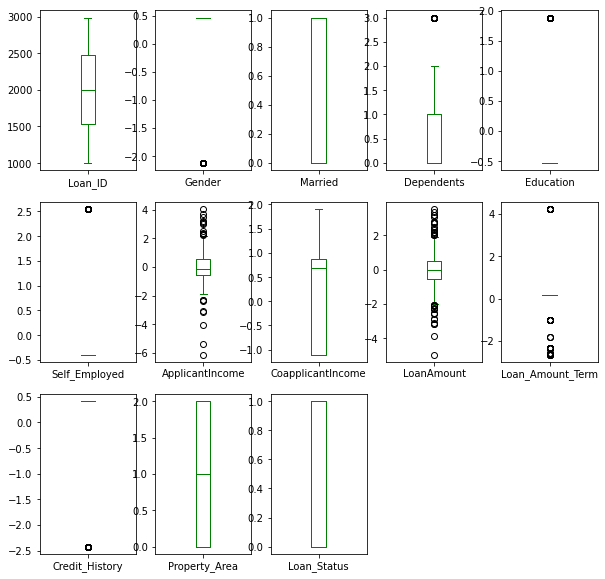

In [75]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(10,10),color='green')
plt.show()

In [76]:
from scipy.stats import zscore
z=np.abs(zscore(df['ApplicantIncome']))


df_new=df[(z<3)]
print(df.shape)
print(df_new.shape)

print("loss_percent= ",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)

(611, 13)
(600, 13)
loss_percent=  1.800327332242226


In [77]:
df=df_new

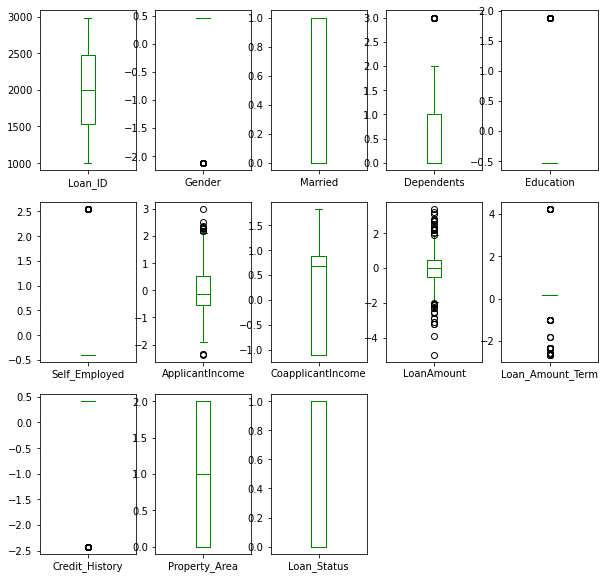

In [78]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(10,10),color='green')
plt.show()

In [79]:
from scipy.stats import zscore
z=np.abs(zscore(df['LoanAmount']))


df_new=df[(z<3)]
print(df.shape)
print(df_new.shape)

print("loss_percent= ",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)

(600, 13)
(592, 13)
loss_percent=  1.3333333333333335


In [80]:
df=df_new

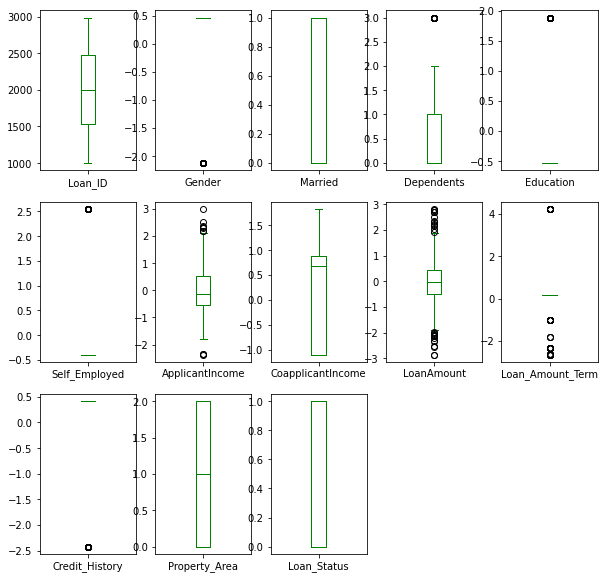

In [81]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(10,10),color='green')
plt.show()

In [82]:
df.shape

(592, 13)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

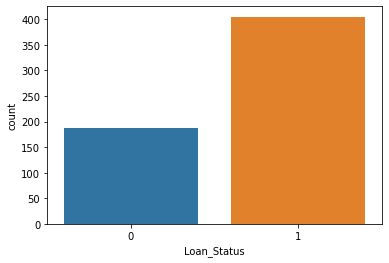

In [83]:
sns.countplot(df['Loan_Status'])

In [84]:
#It is an imbalanced dataset. So we need to apply SMOTE
#Since the dataset is imbalanced, we are applying SMOTE on it
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y) 

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

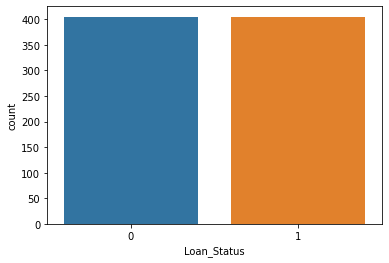

In [85]:
sns.countplot(y)

In [86]:
x.shape

(810, 12)

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [88]:
#Since there are some columns which has low correlation with target but cannot be removed due to practical reasons.
#So we have to apply principal component analysis.

In [89]:
#trying different regression models with n_components=7

from sklearn.decomposition import PCA
pca=PCA(n_components=7)
xpca=pca.fit_transform(x)
xpca=pd.DataFrame(xpca)
x_train,x_test,y_train,y_test=train_test_split(xpca,y,test_size=0.22,random_state=45)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("Accuarcy_score for LogisticRegression is: ",accuracy_score(y_test,y_pred_lr))

rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("Accuarcy_score for RandomForestClassifier is: ",accuracy_score(y_test,y_pred_rfr))

knr=KNeighborsClassifier()
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("Accuarcy_score for KNeighborsClassifier is: ",accuracy_score(y_test,y_pred_knr))

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("Accuarcy_score for GaussianNaiveBayes is: ",accuracy_score(y_test,y_pred_knr))


Accuarcy_score for LogisticRegression is:  0.7988826815642458
Accuarcy_score for RandomForestClassifier is:  0.8491620111731844
Accuarcy_score for KNeighborsClassifier is:  0.5865921787709497
Accuarcy_score for GaussianNaiveBayes is:  0.5865921787709497


In [90]:
#trying different regression models with n_components=8

from sklearn.decomposition import PCA
pca=PCA(n_components=8)
xpca=pca.fit_transform(x)
xpca=pd.DataFrame(xpca)
x_train,x_test,y_train,y_test=train_test_split(xpca,y,test_size=0.22,random_state=45)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("Accuarcy_score for LogisticRegression is: ",accuracy_score(y_test,y_pred_lr))

rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("Accuarcy_score for RandomForestClassifier is: ",accuracy_score(y_test,y_pred_rfr))

knr=KNeighborsClassifier()
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("Accuarcy_score for KNeighborsClassifier is: ",accuracy_score(y_test,y_pred_knr))

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("Accuarcy_score for GaussianNaiveBayes is: ",accuracy_score(y_test,y_pred_knr))


Accuarcy_score for LogisticRegression is:  0.7653631284916201
Accuarcy_score for RandomForestClassifier is:  0.8435754189944135
Accuarcy_score for KNeighborsClassifier is:  0.5865921787709497
Accuarcy_score for GaussianNaiveBayes is:  0.5865921787709497


In [91]:
#trying different regression models with n_components=9

from sklearn.decomposition import PCA
pca=PCA(n_components=9)
xpca=pca.fit_transform(x)
xpca=pd.DataFrame(xpca)
x_train,x_test,y_train,y_test=train_test_split(xpca,y,test_size=0.22,random_state=45)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("Accuarcy_score for LogisticRegression is: ",accuracy_score(y_test,y_pred_lr))

rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("Accuarcy_score for RandomForestClassifier is: ",accuracy_score(y_test,y_pred_rfr))

knr=KNeighborsClassifier()
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("Accuarcy_score for KNeighborsClassifier is: ",accuracy_score(y_test,y_pred_knr))

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("Accuarcy_score for GaussianNaiveBayes is: ",accuracy_score(y_test,y_pred_knr))


Accuarcy_score for LogisticRegression is:  0.770949720670391
Accuarcy_score for RandomForestClassifier is:  0.8379888268156425
Accuarcy_score for KNeighborsClassifier is:  0.5810055865921788
Accuarcy_score for GaussianNaiveBayes is:  0.5810055865921788


In [92]:
#trying different regression models with n_components=11

from sklearn.decomposition import PCA
pca=PCA(n_components=11)
xpca=pca.fit_transform(x)
xpca=pd.DataFrame(xpca)
x_train,x_test,y_train,y_test=train_test_split(xpca,y,test_size=0.22,random_state=45)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("Accuarcy_score for LogisticRegression is: ",accuracy_score(y_test,y_pred_lr))

rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("Accuarcy_score for RandomForestClassifier is: ",accuracy_score(y_test,y_pred_rfr))

knr=KNeighborsClassifier()
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("Accuarcy_score for KNeighborsClassifier is: ",accuracy_score(y_test,y_pred_knr))

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("Accuarcy_score for GaussianNaiveBayes is: ",accuracy_score(y_test,y_pred_knr))


Accuarcy_score for LogisticRegression is:  0.7821229050279329
Accuarcy_score for RandomForestClassifier is:  0.8435754189944135
Accuarcy_score for KNeighborsClassifier is:  0.5810055865921788
Accuarcy_score for GaussianNaiveBayes is:  0.5810055865921788


In [93]:
#trying different regression models with n_components=12

from sklearn.decomposition import PCA
pca=PCA(n_components=12)
xpca=pca.fit_transform(x)
xpca=pd.DataFrame(xpca)
x_train,x_test,y_train,y_test=train_test_split(xpca,y,test_size=0.22,random_state=45)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("Accuarcy_score for LogisticRegression is: ",accuracy_score(y_test,y_pred_lr))

rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("Accuarcy_score for RandomForestClassifier is: ",accuracy_score(y_test,y_pred_rfr))

knr=KNeighborsClassifier()
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("Accuarcy_score for KNeighborsClassifier is: ",accuracy_score(y_test,y_pred_knr))

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("Accuarcy_score for GaussianNaiveBayes is: ",accuracy_score(y_test,y_pred_knr))


Accuarcy_score for LogisticRegression is:  0.770949720670391
Accuarcy_score for RandomForestClassifier is:  0.8715083798882681
Accuarcy_score for KNeighborsClassifier is:  0.5810055865921788
Accuarcy_score for GaussianNaiveBayes is:  0.5810055865921788


In [94]:
#Not applying Principal component analysis.

#from sklearn.decomposition import PCA
#pca=PCA(n_components=9)
#xpca=pca.fit_transform(x)
#xpca=pd.DataFrame(xpca)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=45)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("Accuarcy_score for LogisticRegression is: ",accuracy_score(y_test,y_pred_lr))

rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("Accuarcy_score for RandomForestClassifier is: ",accuracy_score(y_test,y_pred_rfr))

knr=KNeighborsClassifier()
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("Accuarcy_score for KNeighborsClassifier is: ",accuracy_score(y_test,y_pred_knr))

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("Accuarcy_score for GaussianNaiveBayes is: ",accuracy_score(y_test,y_pred_knr))


#We are getting better accuarcy with out PCA.

Accuarcy_score for LogisticRegression is:  0.770949720670391
Accuarcy_score for RandomForestClassifier is:  0.8603351955307262
Accuarcy_score for KNeighborsClassifier is:  0.5810055865921788
Accuarcy_score for GaussianNaiveBayes is:  0.5810055865921788


# Model training begins

#### Tring the Logistic Regression model

In [95]:
#finding the accuracy of DEFAULT Logistic regression model 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('accuracy_score=',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[53 33]
 [ 4 72]]
accuracy_score= 0.7716049382716049
              precision    recall  f1-score   support

           0       0.93      0.62      0.74        86
           1       0.69      0.95      0.80        76

    accuracy                           0.77       162
   macro avg       0.81      0.78      0.77       162
weighted avg       0.82      0.77      0.77       162



In [96]:
#Applying GridSearchCV on LogisitcRegression model

lr=LogisticRegression()
parameters={'penalty':[ 'l2', 'none'],'solver':[ 'lbfgs', 'liblinear', 'sag', 'saga']}
gd_sr=GridSearchCV(estimator=lr, param_grid= parameters,scoring='accuracy')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)


#we are getting the best accuracy with the default model.
#The accuracy is decreasing slightly because k-fold Cross Validation is happening inside GridSearchCV.

{'penalty': 'none', 'solver': 'lbfgs'}
0.739506172839506


In [97]:
#Applying GridSearchCV on LogisitcRegression model

lr=LogisticRegression()
parameters={'penalty':[ 'l2', 'l1'],'solver':['liblinear', 'saga']}
gd_sr=GridSearchCV(estimator=lr, param_grid= parameters,scoring='accuracy')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'penalty': 'l2', 'solver': 'liblinear'}
0.7345679012345678


In [98]:
#finding the best random state for Logistic Regression model
max_acc_score=0
best_rand_state=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LogisticRegression(penalty='none', solver= 'lbfgs')
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    
    if accuracy_score(y_test,y_pred)>max_acc_score:
        max_acc_score=accuracy_score(y_test,y_pred)
        best_rand_state=i

print(max_acc_score)
print(best_rand_state)

#The logistic Regression model is giving a good accuracy.

0.845679012345679
19


#### Trying the KNeighborsClassifier model

In [99]:
#finding the result of default KNeighborsClassifier model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
y_pred=knc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('accuracy_score=',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

#Very low accuracy.
#Still trying hyperparameter tuning.

[[49 37]
 [31 45]]
accuracy_score= 0.5802469135802469
              precision    recall  f1-score   support

           0       0.61      0.57      0.59        86
           1       0.55      0.59      0.57        76

    accuracy                           0.58       162
   macro avg       0.58      0.58      0.58       162
weighted avg       0.58      0.58      0.58       162



In [100]:
#applying GridSearchCV on KneighborsClassifier
knc=KNeighborsClassifier()
parameters={'n_neighbors':[5,6,7,8,9,10,11,12,14],'algorithm':['auto','ball_tree','kd_tree','brute'],'weights':['uniform','distance']}
gd_sr=GridSearchCV(estimator=knc, param_grid= parameters,scoring='accuracy',n_jobs=2)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

#model is not performing well even after hyperparameter tuning.
#Hence we are not approaching further with this model.

{'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'uniform'}
0.35555555555555557


#### Trying the GaussianNaiveBayes algorithm.

In [101]:
#finding the accuracy of default Gaussian_Naive_Bayes classifier model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('accuracy_score=',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

#Here GaussianNaiveBayes is getting lower accuracy than all the previous default models.

[[43 43]
 [ 3 73]]
accuracy_score= 0.7160493827160493
              precision    recall  f1-score   support

           0       0.93      0.50      0.65        86
           1       0.63      0.96      0.76        76

    accuracy                           0.72       162
   macro avg       0.78      0.73      0.71       162
weighted avg       0.79      0.72      0.70       162



In [102]:
#finding the best random state for Gaussian_Naive_Bayes model
max_acc_score=0
best_rand_state=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    gnb=GaussianNB()
    gnb.fit(x_train,y_train)
    y_pred=gnb.predict(x_test)
    
    if accuracy_score(y_test,y_pred)>max_acc_score:
        max_acc_score=accuracy_score(y_test,y_pred)
        best_rand_state=i

print(max_acc_score)
print(best_rand_state)

#gaussian NaiveBayes is giving higher accuracy than Logistic Regression

0.845679012345679
19


#### Trying the SupportVectorClassifier model.

In [103]:
#finding the accuracy of default support vector classifier model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('accuracy_score=',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

#Lets apply hypeparameter tuning on this model

[[27 59]
 [15 61]]
accuracy_score= 0.5432098765432098
              precision    recall  f1-score   support

           0       0.64      0.31      0.42        86
           1       0.51      0.80      0.62        76

    accuracy                           0.54       162
   macro avg       0.58      0.56      0.52       162
weighted avg       0.58      0.54      0.52       162



In [104]:
#applying GridSearchCV on SupportVectorClassifier
svc=SVC()
parameters={'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
gd_sr=GridSearchCV(estimator=svc, param_grid= parameters,scoring='accuracy',n_jobs=2)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

#we are observing a significant improvement in accuracy after hyperparameter tuning.

{'kernel': 'linear'}
0.7345679012345679


In [108]:
#applying GridSearchCV on SupportVectorClassifier with some more parameters.
svc=SVC()
parameters={'C':[10,20,30,40,50,60],'kernel':['linear', 'poly', 'rbf']}
gd_sr=GridSearchCV(estimator=svc, param_grid= parameters,scoring='accuracy',n_jobs=2)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

#we are observing a significant improvement in accuracy after hyperparameter tuning.

{'C': 60, 'kernel': 'linear'}
0.7580246913580246


In [109]:
#applying GridSearchCV on SupportVectorClassifier with some more parameters.
svc=SVC()
parameters={'C':[50,60,70,80,90],'kernel':['linear']}
gd_sr=GridSearchCV(estimator=svc, param_grid= parameters,scoring='accuracy',n_jobs=2)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

#We are getting the best results and the best parameters here.

{'C': 60, 'kernel': 'linear'}
0.7580246913580246


In [112]:
#finding the best random state for SupportVectorClassifier model
max_acc_score=0
best_rand_state=0
for i in range(0,100,5):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    svc=SVC(C=60,kernel='linear')
    svc.fit(x_train,y_train)
    y_pred=svc.predict(x_test)
    
    if accuracy_score(y_test,y_pred)>max_acc_score:
        max_acc_score=accuracy_score(y_test,y_pred)
        best_rand_state=i

print(max_acc_score)
print(best_rand_state)

#The best accuracy obtained from SVC is lower than NaiveBayes, LogisticRegression.

0.8024691358024691
80


#### Training the RandomForestClassifier model

In [113]:
#finding the accuracy of RandomForestClassifier model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('accuracy_score=',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

#The accuracy is higher than all other prevoius models.

[[67 19]
 [ 4 72]]
accuracy_score= 0.8580246913580247
              precision    recall  f1-score   support

           0       0.94      0.78      0.85        86
           1       0.79      0.95      0.86        76

    accuracy                           0.86       162
   macro avg       0.87      0.86      0.86       162
weighted avg       0.87      0.86      0.86       162



In [114]:
#Applying GridSearchCV on RandomForestClassifier model.
rfc=RandomForestClassifier()
parameters={'n_estimators':[40,50,60,70,80,100],'max_depth':[10,15,20,22,24,26,28,'None']}
gd_sr=GridSearchCV(estimator=rfc, param_grid= parameters,scoring='accuracy',n_jobs=2)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'max_depth': 15, 'n_estimators': 50}
0.6024691358024692


In [116]:
#Applying GridSearchCV on RandomForestClassifier model again for better results.
rfc=RandomForestClassifier()
parameters={'n_estimators':[40,45,50,55,60],'max_depth':[10,12,14,15,16,17,18,19,20,'None']}
gd_sr=GridSearchCV(estimator=rfc, param_grid= parameters,scoring='accuracy',n_jobs=2)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)


{'max_depth': 14, 'n_estimators': 45}
0.6012345679012345


In [117]:
##finding out the best random state for random forest classifier model
#parameters are obtained from hyperparameter tuning.
#'max_depth'=14, 'n_estimators'=45
max_acc_score=0
best_rand_state=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    rfc=RandomForestClassifier(max_depth=14,n_estimators=45)
    rfc.fit(x_train,y_train)
    y_pred=rfc.predict(x_test)
    
    if accuracy_score(y_test,y_pred)>max_acc_score:
        max_acc_score=accuracy_score(y_test,y_pred)
        best_rand_state=i

print(max_acc_score)
print(best_rand_state)

0.9135802469135802
19


In [118]:
##finding out the best random state for random forest classifier model
#parameters are obtained from hyperparameter tuning.
#'max_depth'=15, 'n_estimators'=50
max_acc_score=0
best_rand_state=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    rfc=RandomForestClassifier(max_depth=15,n_estimators=50)
    rfc.fit(x_train,y_train)
    y_pred=rfc.predict(x_test)
    
    if accuracy_score(y_test,y_pred)>max_acc_score:
        max_acc_score=accuracy_score(y_test,y_pred)
        best_rand_state=i

print(max_acc_score)
print(best_rand_state)

#We are obtaining the highest accuracy here.
#Hence we are finalising this model.

0.9320987654320988
19


# Buliding the final model

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=19)
rfc=RandomForestClassifier(max_depth=15,n_estimators=50)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('accuracy_score=',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[66  7]
 [ 5 84]]
accuracy_score= 0.9259259259259259
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        73
           1       0.92      0.94      0.93        89

    accuracy                           0.93       162
   macro avg       0.93      0.92      0.93       162
weighted avg       0.93      0.93      0.93       162



# AUC-ROC curve of final model

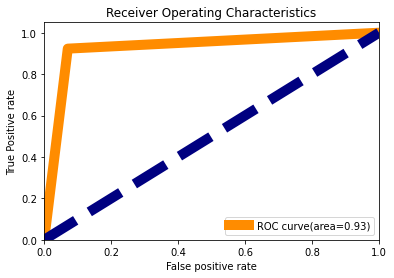

In [120]:
from sklearn.metrics import roc_curve,auc #roc=reeciver operating characteristics, auc= area under curve
fpr,tpr,thresholds=roc_curve(y_pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right') #loc indicates location 
plt.show()

# Saving the model

In [121]:
import pickle
filename='loan_status.pkl'
pickle.dump(rfc,open(filename,'wb'))

In [105]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [106]:
df.dtypes

Loan_ID                int32
Gender               float64
Married                int32
Dependents             int32
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [107]:
x.shape

(810, 12)